# **FINAL PROJECT STATISTICS FOR BUSINESS - Pacmann Academy**
## Dharmayuda Febrianto - ADS Batch 14
---

## **1. Import Packages**

In [61]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# modelling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Estimator
from sklearn.base import BaseEstimator, RegressorMixin

# Performance Metrics
from sklearn.metrics import r2_score

# Cross Validation
from sklearn.model_selection import cross_val_score, cross_validate, KFold

# Regreting Warnings
import warnings
warnings.filterwarnings("ignore")

## **Load Data**

In [62]:
salary = pd.read_csv('Salary Data.csv')
salary.rename(columns = {'Education Level':'EducationLevel', 'Years of Experience':'YearsOfExperience'}, inplace=True)
salary.head()

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


## **2. Data Wrangling, Data Cleaning, Data Manipulation, Data Preprocessing**

In [63]:
salary.shape

(375, 6)

In [64]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                373 non-null    float64
 1   Gender             373 non-null    object 
 2   EducationLevel     373 non-null    object 
 3   Job Title          373 non-null    object 
 4   YearsOfExperience  373 non-null    float64
 5   Salary             373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [65]:
# Identifikasi Missing Values
salary.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,Age,2
1,Gender,2
2,EducationLevel,2
3,Job Title,2
4,YearsOfExperience,2
5,Salary,2


In [66]:
salary[salary['Gender'].isna()]

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Drop Missing Values
salary = salary.dropna()

# Re-check Missing Values
salary.isna().sum().to_frame().reset_index().rename(columns={'index':'column_name', 0:'value'})

,column_name,value
0,Age,0
1,Gender,0
2,EducationLevel,0
3,Job Title,0
4,YearsOfExperience,0
5,Salary,0


In [68]:
# Identifikasi Jumlah Duplicated Values
salary.duplicated().sum()

49

In [69]:
# Identifikasi Duplicated Values
salary[salary.duplicated(keep=False)]

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary
140,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
209,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
210,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
211,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
...,...,...,...,...,...,...
369,33.0,Male,Bachelor's,Junior Business Analyst,4.0,60000.0
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [70]:
# Mengdrop Duplicated Values
salary = salary.drop_duplicates(keep='first')

salary = salary.reset_index(drop=True) # Reset Index

shape = salary.shape
print(f'Bentuk Dataframe Salary adalah: {shape}')

Bentuk Dataframe Salary adalah: (324, 6)


In [71]:
# Recheck Duplicated Data
salary[salary.duplicated(keep=False)]
sum_duplicated = salary.duplicated().sum()

print(f'Jumlah Duplicated Values dalam Dataframe: {sum_duplicated}')

Jumlah Duplicated Values dalam Dataframe: 0


In [72]:
salary

,Age,Gender,EducationLevel,Job Title,YearsOfExperience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
319,28.0,Female,Bachelor's,Junior Operations Manager,1.0,35000.0
320,36.0,Male,Bachelor's,Senior Business Development Manager,8.0,110000.0
321,44.0,Female,PhD,Senior Data Scientist,16.0,160000.0
322,31.0,Male,Bachelor's,Junior Marketing Coordinator,3.0,55000.0


## **3. Exploratory Data Analysis**

In [73]:
salary.describe()

,Age,YearsOfExperience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [74]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                324 non-null    float64
 1   Gender             324 non-null    object 
 2   EducationLevel     324 non-null    object 
 3   Job Title          324 non-null    object 
 4   YearsOfExperience  324 non-null    float64
 5   Salary             324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 15.3+ KB


In [75]:
# Identifikasi Values pada kolom Gender
salary['Gender'].value_counts()

Male      170
Female    154
Name: Gender, dtype: int64

In [76]:
# Identifikasi Values pada kolom Education Level
salary['EducationLevel'].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: EducationLevel, dtype: int64

### Corelation Matrix

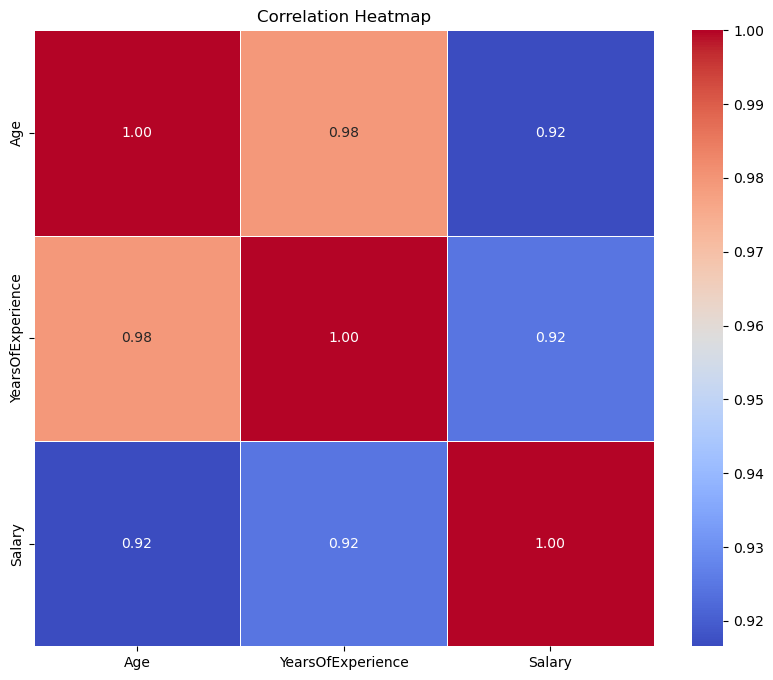

In [77]:
plt.figure(figsize=(10, 8))
sns.heatmap(salary.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [78]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                324 non-null    float64
 1   Gender             324 non-null    object 
 2   EducationLevel     324 non-null    object 
 3   Job Title          324 non-null    object 
 4   YearsOfExperience  324 non-null    float64
 5   Salary             324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 15.3+ KB


### Distribution Numerical Columns

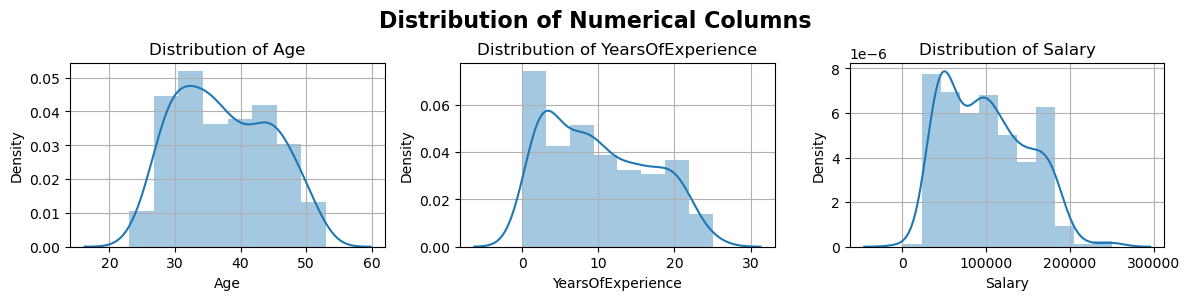

In [79]:
columns = ['Age','YearsOfExperience', 'Salary']
numerical_col = salary[columns]

plt.figure(figsize=(12,10))
plt.suptitle('Distribution of Numerical Columns', fontweight='bold', fontsize=16)
for i,col in enumerate(numerical_col.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col}")
    sns.distplot(numerical_col[col], kde=True)
    plt.grid(True)
    plt.tight_layout()
    plt.plot()

### Categorical Columns Descriptive

In [80]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                324 non-null    float64
 1   Gender             324 non-null    object 
 2   EducationLevel     324 non-null    object 
 3   Job Title          324 non-null    object 
 4   YearsOfExperience  324 non-null    float64
 5   Salary             324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 15.3+ KB


In [81]:
salary.describe(include='object')

,Gender,EducationLevel,Job Title
count,324,324,324
unique,2,3,174
top,Male,Bachelor's,Director of Operations
freq,170,191,9


In [82]:
#Gaji antar jenis kelamin
salary.groupby("Gender")["Salary"].mean()

Gender
Female     96136.363636
Male      103472.647059
Name: Salary, dtype: float64

In [83]:
#Gaji antar level pendidikan
salary.groupby("EducationLevel")["Salary"].mean()

EducationLevel
Bachelor's     73902.356021
Master's      127912.087912
PhD           158095.238095
Name: Salary, dtype: float64

Visualisasi pairplot antar numerical columns

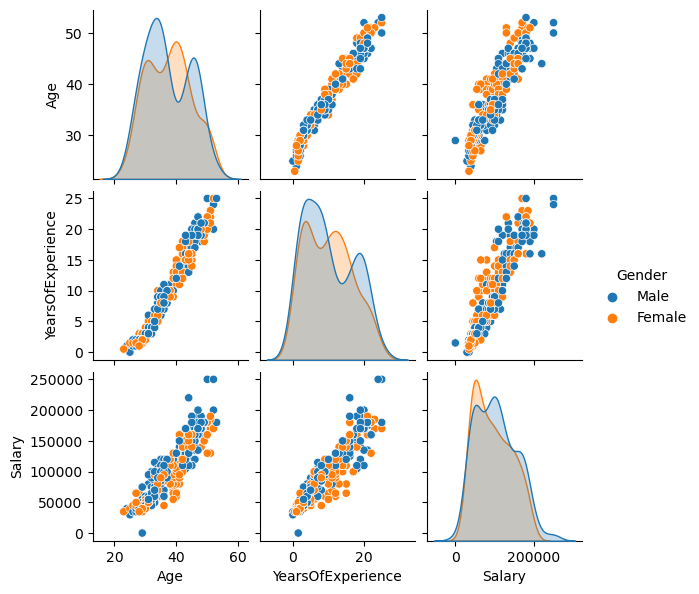

In [84]:
sns.pairplot(data = salary, hue = "Gender", height=2)

## **4. Statistical Test**

- $H_0$ :Rata-rata gaji laki-laki sama dengan dari rata-rata gaji perempuan
- $H_1$ :Rata-rata gaji laki-laki lebih besar dari rata-rata gaji perempuan

1. Semakin bertambahnya pengalaman kerja seseorang, besaran gaji yang diterimanya juga meningkat.

2. Semakin tua seseorang, semakin banyak pengalaman kerja yang dapat diakumulasikan.

**Gaji tidak dipengaruhi oleh jenis kelamin.**

In [85]:
significance_level = 0.10
salary.groupby("Gender")["Salary"].mean()

Gender
Female     96136.363636
Male      103472.647059
Name: Salary, dtype: float64

In [86]:
male = salary[salary["Gender"]=="Male"]["Salary"].values
female = salary[salary["Gender"]=="Female"]["Salary"].values

# Variance
np.var(male), np.var(female)

(2571353207.6989617, 2097896989.374262)

In [87]:
from scipy import stats
result = stats.ttest_ind(a = male, b = female, equal_var=False, alternative = "greater")
result.pvalue

0.08675461782037655

In [88]:
if result.pvalue < significance_level:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject Null Hypothesis")

Reject Null Hypothesis


In [89]:
# Degree of Freedom
data = len(male)+len(female)
data

324

Plot Sample Distribution

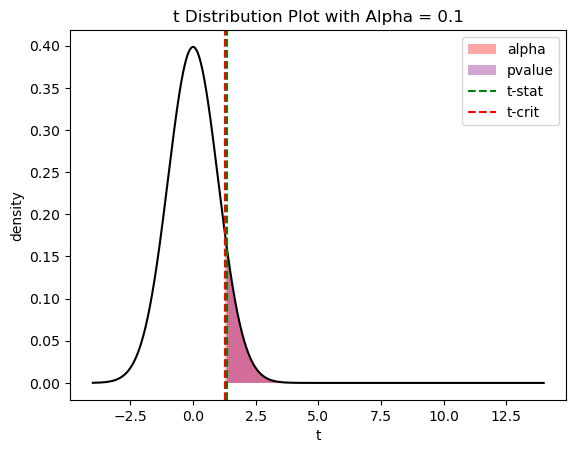

In [90]:
# Plot Sample Distribution
x = np.arange(-4, 14, 0.001)
plt.plot(x, stats.t.pdf(x, df=data), color='black')
x_alpha = np.arange(stats.t.ppf(1-significance_level, df = data), 4, 0.01)
y_alpha = stats.t.pdf(x_alpha, df = data)
plt.fill_between(x = x_alpha, y1 = y_alpha, facecolor = 'red', alpha = 0.35, label = 'alpha')

# plot value
x_pvalue = np.arange(result.statistic, 4, 0.01)
y_pvalue = stats.t.pdf(x_pvalue, df = data)
plt.fill_between(x = x_pvalue, y1 = y_pvalue, facecolor = 'purple', alpha = 0.35, label = 'pvalue')
plt.axvline(np.round(result.statistic, 4), color ="green", linestyle = "--", label ="t-stat")
t_crit = np.round(stats.t.ppf(1-significance_level, df = data), 4)
plt.axvline(t_crit, color ="red", linestyle = "--", label ="t-crit")
plt.legend()
plt.xlabel("t")
plt.ylabel("density")
plt.title(f't Distribution Plot with Alpha = {significance_level}');
plt.show()

#### Confidence Level

In [91]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
cm = CompareMeans(d1=DescrStatsW(data=male),
                  d2=DescrStatsW(data=female))

lower, upper = cm.tconfint_diff(alpha=significance_level, alternative='two-sided', usevar='unequal')
print(f'Nilai Confidence Interval sebesar: [{lower}, {upper}]')

Nilai Confidence Interval sebesar: [-1535.8717753119818, 16208.438620231766]


## **5. Regression Model**

sebelum melakukan regression modeling, kita perlu menghapus kolom "`Job Title`" karena tidak memiliki relevansi dengan objective goals yang telah di buat sebelumnya

In [92]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                324 non-null    float64
 1   Gender             324 non-null    object 
 2   EducationLevel     324 non-null    object 
 3   Job Title          324 non-null    object 
 4   YearsOfExperience  324 non-null    float64
 5   Salary             324 non-null    float64
dtypes: float64(3), object(3)
memory usage: 15.3+ KB


In [93]:
salary.drop("Job Title", axis=1, inplace=True)
salary

,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32.0,Male,Bachelor's,5.0,90000.0
1,28.0,Female,Master's,3.0,65000.0
2,45.0,Male,PhD,15.0,150000.0
3,36.0,Female,Bachelor's,7.0,60000.0
4,52.0,Male,Master's,20.0,200000.0
...,...,...,...,...,...
319,28.0,Female,Bachelor's,1.0,35000.0
320,36.0,Male,Bachelor's,8.0,110000.0
321,44.0,Female,PhD,16.0,160000.0
322,31.0,Male,Bachelor's,3.0,55000.0


#### Convert Categorical Columns to Numerical Columns

In [94]:
salary["EducationLevel"].value_counts()

Bachelor's    191
Master's       91
PhD            42
Name: EducationLevel, dtype: int64

In [95]:
salary["Gender"].value_counts()

Male      170
Female    154
Name: Gender, dtype: int64

setelah melakukan cek data pada `Education Level` dan `Gender`, langkah selanjutnya adalah sebagai berikut 
- mengubah `male` menjadi angka 0 dan `female` menjadi angka 1
- mengubah `Bachelor's` = 0, `Master's` = 1, `PhD` = 2

In [96]:
salary["EducationLevel"] = salary["EducationLevel"].map({"Bachelor's":0,"Master's":1,"PhD":2})
salary["Gender"] = salary["Gender"].map({"Male":0,"Female":1})
salary.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32.0,0,0,5.0,90000.0
1,28.0,1,1,3.0,65000.0
2,45.0,0,2,15.0,150000.0
3,36.0,1,0,7.0,60000.0
4,52.0,0,1,20.0,200000.0


In [97]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                324 non-null    float64
 1   Gender             324 non-null    int64  
 2   EducationLevel     324 non-null    int64  
 3   YearsOfExperience  324 non-null    float64
 4   Salary             324 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 12.8 KB


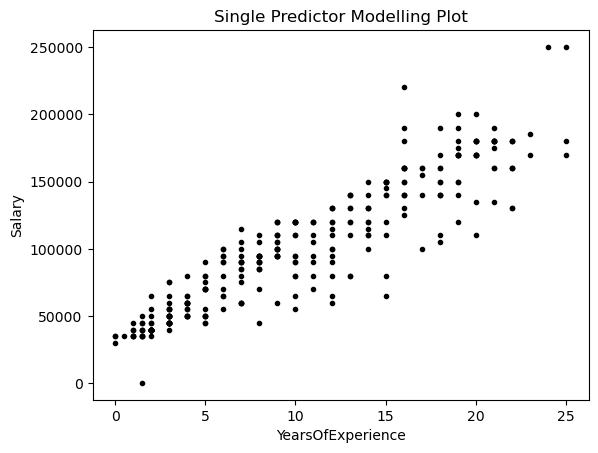

In [113]:
# Single Predictor Modelling
x = salary["YearsOfExperience"]
y = salary["Salary"]
plt.scatter(x, y, color = "k", marker=".")
plt.xlabel("YearsOfExperience")
plt.ylabel("Salary")
plt.title("Single Predictor Modelling Plot")
plt.show()

In [99]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                324 non-null    float64
 1   Gender             324 non-null    int64  
 2   EducationLevel     324 non-null    int64  
 3   YearsOfExperience  324 non-null    float64
 4   Salary             324 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 12.8 KB


In [100]:
salary.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32.0,0,0,5.0,90000.0
1,28.0,1,1,3.0,65000.0
2,45.0,0,2,15.0,150000.0
3,36.0,1,0,7.0,60000.0
4,52.0,0,1,20.0,200000.0


In [101]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from statsmodel
    :return df: <pandas DataFrame>  combined estimated coefficient and standard error of model estimate
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [102]:
model = smf.ols('Salary ~ YearsOfExperience', salary)
results = model.fit()
results_salary = print_coef_std_err(results)
results_salary

,coef,std err
Intercept,31959.508721,1873.552736
YearsOfExperience,6762.954641,155.446221


In [103]:
results.rsquared

0.8546166681460778

#### **Persamaan Regresi Linear**

Setelah didapatkan rsquared dengan nilai $0.8546166681460778$, intercept dengan nilai $31959.508721$ dan coeficient dengan nilai $6762.954641$, maka untuk model persamaan regresi linear dari `YearsOfExperience` terhadap `Salary` adalah:
$$
\text{Salary} = 331959.508721 + 6762.954641 \times \text{Years of Experience}
$$

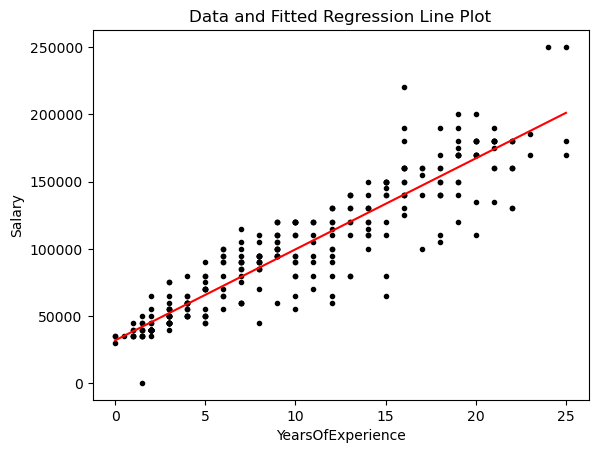

In [118]:
#Visualization
predictor = "YearsOfExperience"
outcome = "Salary"
data = salary.copy()
results_ = results_salary.copy()
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]
x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), 10000)
fitted_values = a_hat + b_hat * x_domain

# Show the plot
plt.plot(x_domain, fitted_values, label="Fitted line", color = "red")
plt.ylabel(outcome)
plt.xlabel(predictor)
plt.title("Data and Fitted Regression Line Plot")
plt.show()

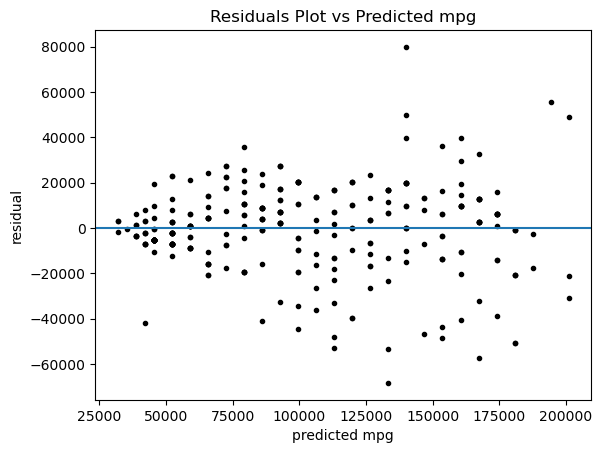

In [120]:
# Residual Plot
plt.scatter(results.fittedvalues, results.resid, marker=".", c = "k")
plt.axhline([0])
plt.xlabel("predicted mpg")
plt.ylabel("residual")
plt.title(f"Residuals Plot vs Predicted mpg")
plt.show()

In [106]:
results.rsquared

0.8546166681460778

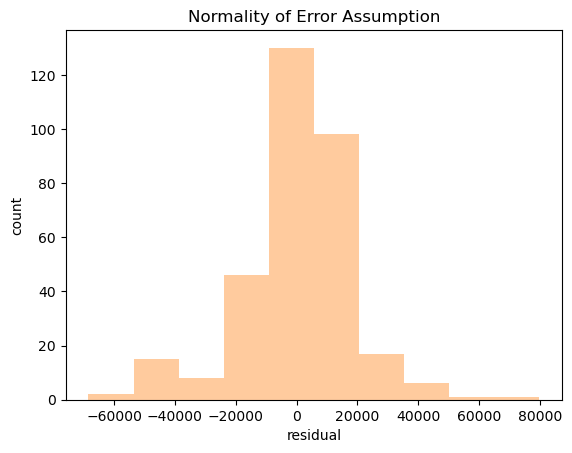

In [123]:
# Normality of Error Assumption
plt.hist(results.resid, color='tab:orange', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")
plt.title(f"Normality of Error Assumption")
plt.show()

In [108]:
# Fit Linear Regression with Log Transform on Weight Variable
salary["logYOE"] = np.log(salary["YearsOfExperience"])
salary.loc[salary["YearsOfExperience"] == 0, "logYOE"] = 0
salary.describe()

,Age,Gender,EducationLevel,YearsOfExperience,Salary,logYOE
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,37.382716,0.475309,0.540123,10.058642,99985.648148,2.005576
std,7.185844,0.500162,0.713597,6.650470,48652.271440,0.874208
min,23.000000,0.000000,0.000000,0.000000,350.000000,-0.693147
25%,31.000000,0.000000,0.000000,4.000000,55000.000000,1.386294
50%,36.500000,0.000000,0.000000,9.000000,95000.000000,2.197225
75%,44.000000,1.000000,1.000000,16.000000,140000.000000,2.772589
max,53.000000,1.000000,2.000000,25.000000,250000.000000,3.218876


In [109]:
# Create OLS
model = smf.ols("Salary ~ logYOE", salary)
results_logtransform = model.fit()
results_salary_log = print_coef_std_err(results_logtransform)
results_logtransform.rsquared

0.7656239539695424

In [110]:
# Multiple Predictors Modelling
salary.drop("logYOE", axis=1, inplace=True)
salary.head()

,Age,Gender,EducationLevel,YearsOfExperience,Salary
0,32.0,0,0,5.0,90000.0
1,28.0,1,1,3.0,65000.0
2,45.0,0,2,15.0,150000.0
3,36.0,1,0,7.0,60000.0
4,52.0,0,1,20.0,200000.0


In [111]:
class StatsmodelsRegressor(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for statsmodels regressors """
    
    def __init__(self, sm_class, sm_formula):
        self.sm_class = sm_class
        self.sm_formula = sm_formula
        self.model = None
        self.result = None
 
    def fit(self, data, dummy):
        self.model = self.sm_class(self.sm_formula, data)
        self.result = self.model.fit()
 
    def predict(self,X):
        return self.result.predict(X)

In [112]:
def kfold_split(data, n_fold):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param data: <pandas DataFrame> 
    :param n_fold: <int> Number of fold in k-fold CV
    :return fold_train: <pandas DataFrame> Training Data
    :return fold_test: <pandas DataFrame> Testing Data
    """
    kfold = KFold(n_splits = n_fold, shuffle = True, random_state=123)
    fold_train = {}
    fold_test = {}

    for i, (train, test) in enumerate(kfold.split(data)):
        print(f"fold {i+1}, train data rows: {len(train)}, test data rows: {len(test)}")
        fold_train[i] = data.iloc[train].copy()
        fold_test[i] = data.iloc[test].copy()
        
    return (fold_train, fold_test)

In [124]:
#Evaluate a model using K-fold cross validation
# Create a class model
ols_all_pred = StatsmodelsRegressor(
    smf.ols, "Salary ~ Age + Gender + C(EducationLevel) + YearsOfExperience + Age:YearsOfExperience")

# Create k-fold splitter object
kfold = KFold(n_splits=5, shuffle = True, random_state=123)
scores_ols_all_pred = cross_val_score(
    estimator = ols_all_pred, X = salary, y = salary["Salary"], cv = kfold,scoring = "r2")
scores_ols_all_pred = pd.DataFrame(data = scores_ols_all_pred, columns=["test_rsquared"])
scores_ols_all_pred["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_all_pred

,test_rsquared,folds
0,0.892141,Folds 1
1,0.902729,Folds 2
2,0.912515,Folds 3
3,0.825113,Folds 4
4,0.897267,Folds 5


In [126]:
scores_ols_all_pred["test_rsquared"].mean()

0.8859529642576712

In [128]:
# Fit Linear Regression Using All Predictors
# Create OLS model
model = smf.ols("Salary ~ Age + Gender + C(EducationLevel) + YearsOfExperience + Age:YearsOfExperience", salary)
results_model_salary = model.fit()
results_salary = print_coef_std_err(results_model_salary)
results_salary

,coef,std err
Intercept,-44159.185552,16580.736611
C(EducationLevel)[T.1],19574.074815,2257.344892
C(EducationLevel)[T.2],26339.473807,3160.610738
Age,3042.039143,611.919060
Gender,-9310.571777,1766.475849
YearsOfExperience,2433.641886,1211.995905
Age:YearsOfExperience,3.452762,21.044653


In [129]:
# Centering Predictor Age
mean_age = salary["Age"].mean()
mean_age = np.round(mean_age,0)
mean_age

salary["Age"] = salary["Age"]-mean_age
salary.rename(columns = {"Age":"AgeCentered"}, inplace=True)
salary.head()

,AgeCentered,Gender,EducationLevel,YearsOfExperience,Salary
0,-5.0,0,0,5.0,90000.0
1,-9.0,1,1,3.0,65000.0
2,8.0,0,2,15.0,150000.0
3,-1.0,1,0,7.0,60000.0
4,15.0,0,1,20.0,200000.0


In [130]:
# Create a class model
ols_all_pred = StatsmodelsRegressor(
    smf.ols, "Salary ~ AgeCentered + Gender + C(EducationLevel) + YearsOfExperience + AgeCentered:YearsOfExperience")

# Create k-fold splitter
kfold = KFold(n_splits=5, shuffle = True, random_state=12)
scores_ols_all_pred = cross_val_score(
    estimator = ols_all_pred, X = salary, y = salary["Salary"], cv = kfold, scoring = "r2")
scores_ols_all_pred = pd.DataFrame(data = scores_ols_all_pred, columns=["test_rsquared"])
scores_ols_all_pred["folds"] = [f"Folds {i+1}" for i in range(5)]
scores_ols_all_pred

,test_rsquared,folds
0,0.849681,Folds 1
1,0.907836,Folds 2
2,0.873470,Folds 3
3,0.938117,Folds 4
4,0.881399,Folds 5


In [131]:
scores_ols_all_pred["test_rsquared"].mean()
#Model yang digunakan semua media memiliki kecocokan yang baik
#Dapat menjelaskan 89% varians gaji.

0.890100702896922

In [133]:
# Create OLS model
model = smf.ols(
    'Salary ~ AgeCentered + Gender + C(EducationLevel) + YearsOfExperience + AgeCentered:YearsOfExperience', salary)
results = model.fit()
results_salary = print_coef_std_err(results)
results_salary

,coef,std err
Intercept,68396.262743,6722.803498
C(EducationLevel)[T.1],19574.074815,2257.344892
C(EducationLevel)[T.2],26339.473807,3160.610738
AgeCentered,3042.039143,611.919060
Gender,-9310.571777,1766.475849
YearsOfExperience,2561.394070,714.405923
AgeCentered:YearsOfExperience,3.452762,21.044653


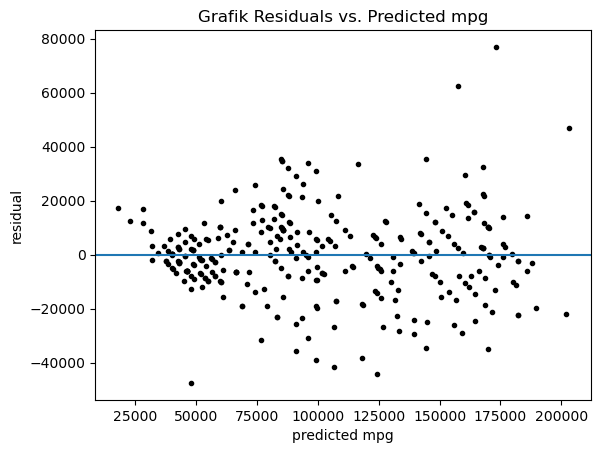

In [134]:
# Residual Plot and Explained Variance
plt.scatter(results.fittedvalues, results.resid, marker=".", c = "k")
plt.axhline([0])
plt.xlabel("predicted mpg")
plt.ylabel("residual")
plt.title(f"Grafik Residuals vs. Predicted mpg")
plt.show()

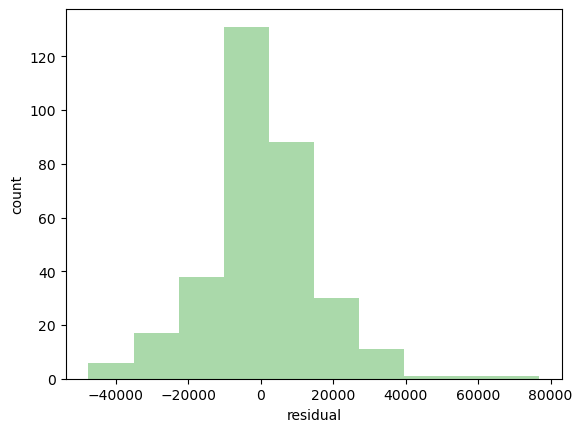

In [135]:
# Normality of Error Assumption
plt.hist(results.resid, color='tab:green', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")
plt.show()